# Project Final Report
## Predicting Online News Popularity
#### Team members: Mary Fleck (mfleck) & Xiaojun Ma (xm2)

## Table of Contents
1. [Background](#bg)
2. [Problem Statement](#state)
3. [Key Findings](#key)
4. [Data](#data)
5. [Exploratory Data Analysis](#EDA)
6. [Method of Analysis](#method)<br>
 a. [Model Selection](#model_method)<br>
 b. [Feature Importance](#feature_method)
7. [Conclusion of Findings](#finding)<br>
 a. [Model Selection](#model_finding)<br>
 b. [Feature Importance](#feature_finding)
8. [Recommendations](#recommendation)
9. [Limitation and Future Work](#future_work)
10. [Appendix](#appendix)

link for the presentation video:https://www.youtube.com/watch?v=ZQkCc0RxRCE&feature=youtu.be

### 1. Background<a name="bg"></a>
We were inspired by the constant discussion about the news in 2020 to do our project on the news - in particular, the popularity of news articles. This year, it seems that more than ever, discussions have arisen not only about the topics in the news but about the news itself. Whether it be about the language used to describe the Coronavirus, violence used as clickbait during this summer of protests, or election media in the culmination of a presidency obsessed with “fake news”, conversations about news have been unavoidable. With that, understanding the news - what is newsworthy and why - seems more relevant than ever. Furthermore, in the policy world, news coverage about policy interventions has the power to garner or undermine support crucial to implementation. All of these discussions about the news have continued to make the news industry worth billions of dollars. However, consumers of the news now have more platforms seeking their attention than ever before. Expertise that would help news sites be more profitable are also extremely valuable at this time.


### 2. Problem Statement<a name="state"></a>

We want to know:
- How to predict which news articles will be popular
- What features about news articles make them more popular

This is important to:
- Help news sites become more profitable: Generate a model and feature insights that will give a company an advantage over other platforms vying for customer consumption.
- Raise awareness of important issues: Insights about what makes news popular can produce insights to help policy writers gain a following around their policy issue.

Trade-offs:
Efficiency (popularity prediction) and fairness (even distribution of article post days and themes)

### 3. Key Findings<a name="key"></a>

Our model is 54% more accurate at selecting news articles in top 10% of popularity than a random guess

Subjective, negative news is more popular

News sites should emphasize including popular keywords, referencing other popular articles, increasing unique, meaningful content, and decreasing word length in order for articles to be more popular.

### 4. Data<a name="data"></a>
The data that we used is the Online News Popularity Dataset, found on the UC Irvine Machine Learning repository (accessible here: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). The dataset has nearly 40,000 rows, and 61 variables. Each row represents a news article, and each of the features are characteristics of the article, describing aspects such as the polarity of the words it contains, the topic it covers, the number of images, and more. We intend to focus on the number of shares for each article as our target for prediction.

### 5. Exploratory Data Analysis<a name="EDA"></a>

In [1]:
import pandas as pd
from plotnine import *
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')

__Preliminary statistics__

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
pd.options.display.max_rows = 100
data.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [5]:
pd.set_option('display.max_columns', 999)
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [6]:
data[' num_imgs'][:10] #column names have a space in front

0     1.0
1     1.0
2     1.0
3     1.0
4    20.0
5     0.0
6    20.0
7    20.0
8     0.0
9     1.0
Name:  num_imgs, dtype: float64

In [7]:
#Remove space in the front of all of the column names
data.columns = [x[1:] for x in data.columns]

In [8]:
data.num_imgs[:10]

0     1.0
1     1.0
2     1.0
3     1.0
4    20.0
5     0.0
6    20.0
7    20.0
8     0.0
9     1.0
Name: num_imgs, dtype: float64

__Distribution of shares column - our outcome/target variable__

E:\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_bin : Removed 58 rows containing non-finite values.
E:\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


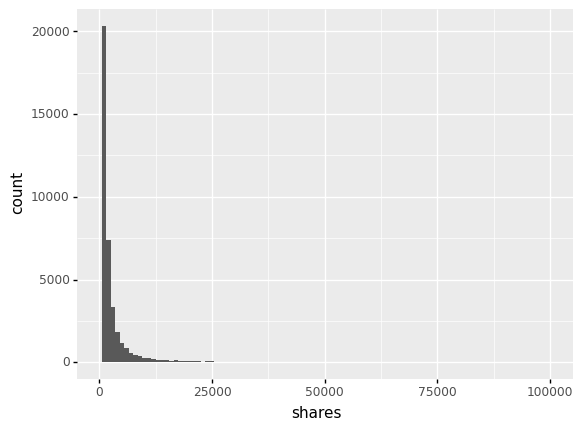

<ggplot: (148342618634)>

In [9]:
(
    ggplot(data, aes(x='shares')) 
        + geom_histogram(binwidth = 1000)
        + xlim(0,100000)
)

The data is highly right skewed. This makes sense as only very few articles become extremely popular.

__Correlation matrix__

In [10]:
import matplotlib.pyplot as plt

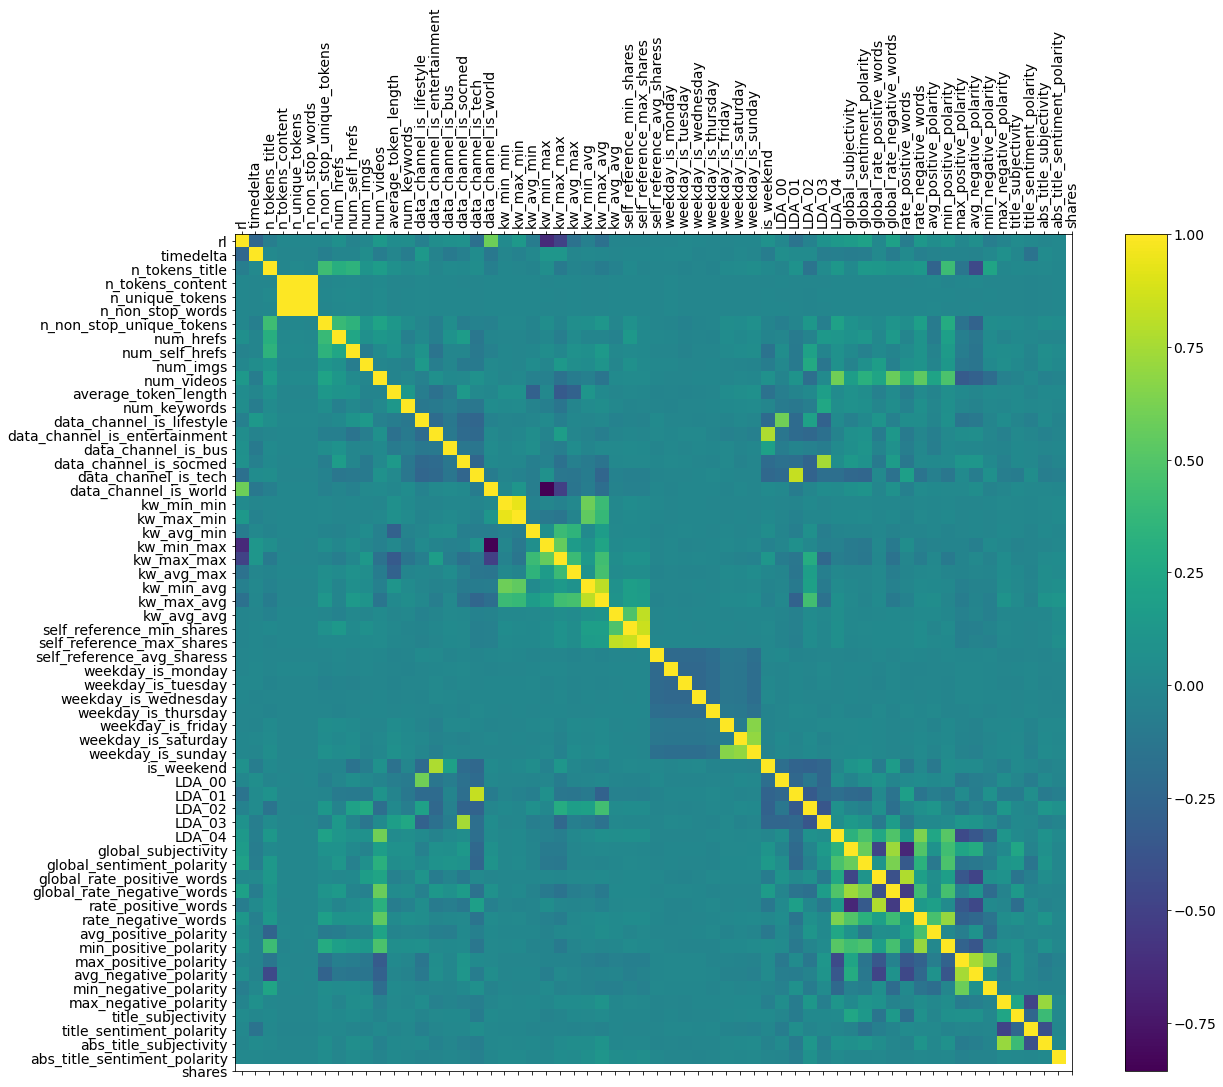

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

It appears that there are a few correlations that have relatively high absolute values. In order to make sure these variables won't introduce any redundancy or bias in our model, we will remove variables with high correlations or that seem redundant.

In [12]:
#eliminate variables with high correlations
data = data.drop(data.columns[[3,4,5,21,23,26,30,38,39,41,43,48,49,50,51,52,53,54,55,56]], axis=1)

In [13]:
c = data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[1459:1559]

LDA_03                         data_channel_is_entertainment    0.209070
weekday_is_monday              weekday_is_thursday              0.212904
weekday_is_thursday            weekday_is_monday                0.212904
weekday_is_tuesday             weekday_is_monday                0.215107
weekday_is_monday              weekday_is_tuesday               0.215107
weekday_is_wednesday           weekday_is_monday                0.215912
weekday_is_monday              weekday_is_wednesday             0.215912
data_channel_is_entertainment  data_channel_is_tech             0.221935
data_channel_is_tech           data_channel_is_entertainment    0.221935
num_hrefs                      average_token_length             0.222588
average_token_length           num_hrefs                        0.222588
data_channel_is_bus            data_channel_is_world            0.224945
data_channel_is_world          data_channel_is_bus              0.224945
weekday_is_tuesday             weekday_is_thursday 

After removing these columns, there are no correlations in the dataset larger than 0.6

__Days of the week vs weekends__

In [14]:
days = [(data.columns[x], sum(data.iloc[:,x])) for x in list(np.arange(31,38,1))]

In [15]:
days = pd.DataFrame(days)

In [16]:
days.columns = ['day', 'count']

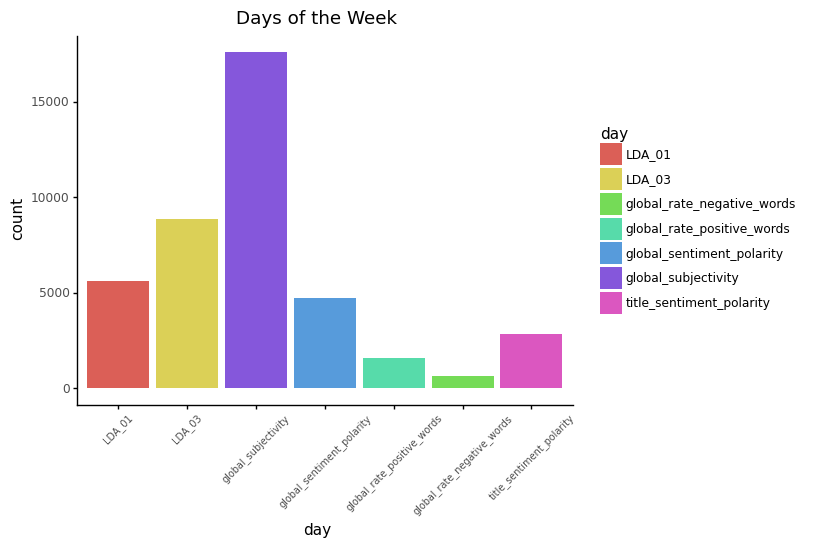

<ggplot: (148344367324)>

In [17]:
(
    ggplot(days, aes(x='day', y='count', fill='day')) 
        + geom_bar(stat='identity')
        + theme_classic()
        + labs(title= "Days of the Week")
        + theme( axis_text_x = element_text(angle=45, vjust=1, size = 7))
        + scale_x_discrete(limits=days.loc[:,'day'])
                       
)

Since we find this feature interesting, we figured we would see what the frequency breakdown is. It appears to be least common that news articles are posted on saturdays and sundays, with the most popular day being wednesday.

__Polarity__

E:\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 160'. Pick better value with 'binwidth'.


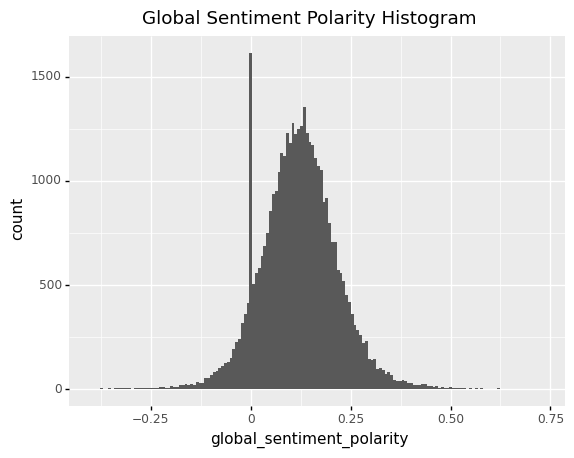

<ggplot: (148344371300)>

In [18]:
(
    ggplot(data, aes(x='global_sentiment_polarity')) 
        + geom_histogram()
        #+ theme_classic()
        + labs(title= "Global Sentiment Polarity Histogram")
                       
)

E:\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 228'. Pick better value with 'binwidth'.


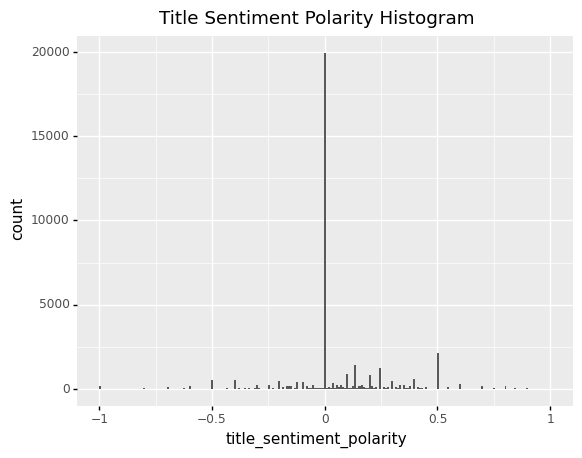

<ggplot: (148344371481)>

In [19]:
(
    ggplot(data, aes(x='title_sentiment_polarity')) 
        + geom_histogram()
        #+ theme_classic()
        + labs(title= "Title Sentiment Polarity Histogram")
                       
)

We are also interested in the polarity fields. It is interesting to note the normal shape of the distribution of the global sentiment polarity, but that it is not centered at zero. The title sentiment polarity is much more often zero, giving it a much different distribution.

__Channel__

In [20]:
channels = [(data.columns[x], sum(data.iloc[:,x])) for x in list(np.arange(13,19,1))]

In [21]:
channels = pd.DataFrame(channels)

In [22]:
channels.columns = ['channel', 'count']

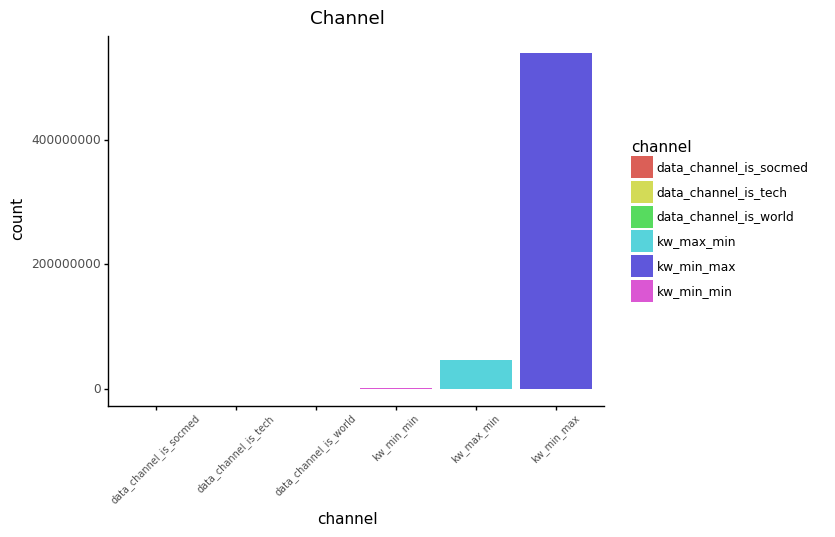

<ggplot: (148344426237)>

In [23]:
(
    ggplot(channels, aes(x='channel', y='count', fill='channel')) 
        + geom_bar(stat='identity')
        + theme_classic()
        + labs(title= "Channel")
        + theme( axis_text_x = element_text(angle=45, vjust=1, size = 7))
        + scale_x_discrete(limits=channels.sort_values(by='count').loc[:,'channel'])
                       
)

Similarly to weekday, we wanted to see a frequency breakdown by channel. Lifestyle articles are least common, where world articles are most common.

__Refining hypotheses__

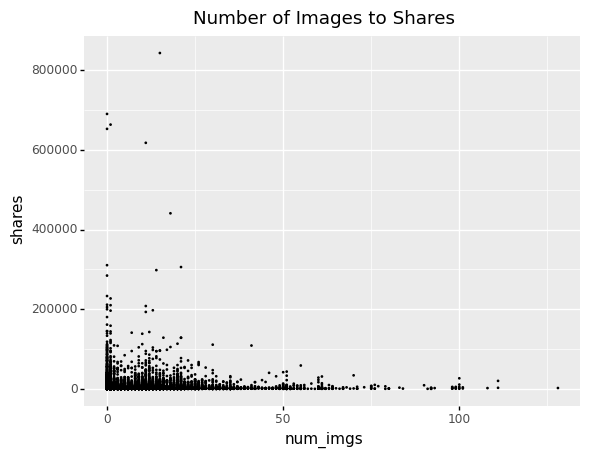

<ggplot: (148344417130)>

In [24]:
(
    ggplot(data, aes(x='num_imgs',y='shares')) 
        + geom_point(size = 0.1)
        + labs(title= "Number of Images to Shares")
)

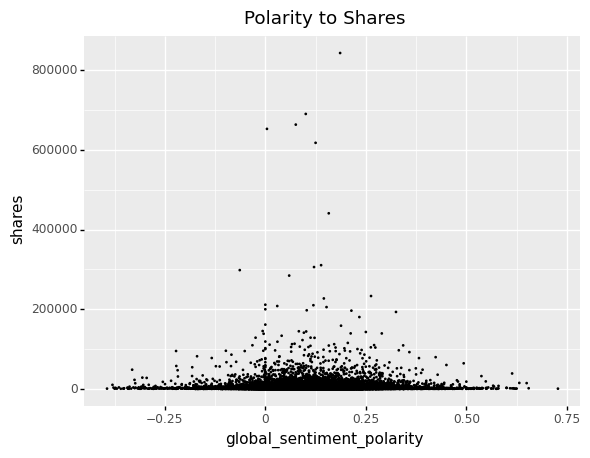

<ggplot: (148344407290)>

In [25]:
(
    ggplot(data, aes(x='global_sentiment_polarity',y='shares')) 
        + geom_point(size = 0.1)
        + labs(title= "Polarity to Shares")
                        
)

We had originally thought that the number of images and the polarity might be features of interest that might play a strong role in predicting the number of shares. This seems more likely for the polarity, but neither of the relationships are really very strong. We will have to see what features perform best.

### 6. Method of Analysis<a name="method"></a>
We frame our Machine Learning problem in such a formulation: Everyday, before the daily news are published online, we want to identify the top 10 percent of news which are most likely to be popular after publication, in that way, the news website can prioritize broadcast for those news (put those news at the top of the page; post about those news on social media).<br>
So, to do that, we want to select a model that has a good precision at top 10 percent but at the same time is relatively fair towards different channels and weekdays. Basically, we want the model TPR to be similar for different channels; also similar for different weekdays.
Also, after we have selected a model, we want to look into the feature importance of different features and see if that tells us what are the features that make a news more popular than others.

#### 6.a Model Selection<a name="model_method"></a>
__Pre-modeling steps:__<br>
First, we need to decide on the cutoff to generate a binary label indicating whether a news is popular or not (1 being popular, 0 otherwise). We picked the cutoff to be the median # of shares - 1400. In this case, we have a relatively balanced dataset.<br>
Then, we need to have a train/test split of the dataset. Because the dataset is time-series, we use the earlier 70% as our training set and the latest 30% as our test set to prevent time overlap between training and test sets.<br>
Finally, we need to scale the features before modeling. In our case, we use a minmax scaler to scale each feature to 0,1 range.

In [26]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [27]:
#read data
df=pd.read_csv('OnlineNewsPopularity.csv')

#change the df name
df.columns=[x.strip() for x in list(df.columns)]

In [28]:
#Choose the cutoff
y_median=df['shares'].quantile(0.5)
print('cut off is:',y_median)

#label the dataframe
df['label']=[1 if x>=y_median else 0 for x in df['shares']]

#train/test split - because the data is time series, we should not just use random split, we are using the earlier 70% percent data as training, the rest 30% as testing
split_timedelta = df['timedelta'].quantile(0.3)

train_df = df[df['timedelta']<=split_timedelta]
test_df = df[df['timedelta']>split_timedelta]
X_train = train_df.drop(['url','shares', 'timedelta','label'], axis=1)
X_test = test_df.drop(['url','shares', 'timedelta','label'], axis=1)
y_train = train_df['label']
y_test = test_df['label']
X_names = list(X_train.columns)

#Feature Scaling - MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cut off is: 1400.0


__Baseline:__ <br>
Here we also determine a base rate we want to beat, and the base rate would be predicting with all 1, which is marking every news as popular, which will give us a base rate accuaracy:

In [29]:
print('base rate | accuracy:',sum(y_test)/len(y_test))

base rate | accuracy: 0.5483194795807734


__Define model evaluation metrics:__<br>
1. Precision at top 10: this is the efficiency evaluation metric we picked. We assume that for the average 50 news the website post, 10% of those could be posted at the front page of the website and could be broadcast on social media. We want to help company predict which ones are most likely to be popular 10 percent, so we picked precision at top 10% to be our measurement for model performance.<br>
2. TPR vars: these are some evaluation metrics we invented. Borrowed from the idea of TPR ratio, we look at TPR variance in different channels (e.g. business, lifestyle, tech...) and TPR variance in different weekdays (e.g. Monday, Tuesday, Wednesday...). We want the channels TPR variance and the Weekdays TPR variance to be as small as possible to be fair for each channel and each weekday.

In [30]:
#precision at top 10
def precision_at_k(y_true, y_score, k=0.1):
    '''take in y_true and y_score and k to return the precision at top k'''
    df = pd.DataFrame({'true': y_true, 'score': y_score[:,1]}).sort_values(by=['score'],ascending=False)
    top_k = df[:int(k*len(df))]
    y_pred = pd.Series([1 if i > 0.5 else 0 for i in top_k['score']])
    return metrics.precision_score(top_k['true'], y_pred)

In [31]:
def tprs(X_test,X_names,y_test, model):
    '''take in the X_test, X_names(feature name list), y_test and the model to produce a dataframe list the Weekday TPRs and Channel TPRs for that model'''
    test_result_df = pd.DataFrame(X_test, columns=X_names)
    test_result_df['predict']=list(model.predict(X_test))
    test_result_df['true']=y_test
    
    monday_df = test_result_df[test_result_df['weekday_is_monday']==1]
    monday_tpr = metrics.recall_score(monday_df['true'], monday_df['predict'])
    tuesday_df = test_result_df[test_result_df['weekday_is_tuesday']==1]
    tuesday_tpr = metrics.recall_score(tuesday_df['true'], tuesday_df['predict'])
    wednesday_df = test_result_df[test_result_df['weekday_is_wednesday']==1]
    wednesday_tpr = metrics.recall_score(wednesday_df['true'], wednesday_df['predict'])
    thursday_df = test_result_df[test_result_df['weekday_is_thursday']==1]
    thursday_tpr = metrics.recall_score(thursday_df['true'], thursday_df['predict'])
    friday_df = test_result_df[test_result_df['weekday_is_friday']==1]
    friday_tpr = metrics.recall_score(friday_df['true'], friday_df['predict'])
    saturday_df = test_result_df[test_result_df['weekday_is_saturday']==1]
    saturday_tpr = metrics.recall_score(saturday_df['true'], saturday_df['predict'])
    sunday_df = test_result_df[test_result_df['weekday_is_sunday']==1]
    sunday_tpr = metrics.recall_score(sunday_df['true'], sunday_df['predict'])
    
    lifestyle_df = test_result_df[test_result_df['data_channel_is_lifestyle']==1]
    lifestyle_tpr = metrics.recall_score(lifestyle_df['true'], lifestyle_df['predict'])
    entertainment_df = test_result_df[test_result_df['data_channel_is_entertainment']==1]
    entertainment_tpr = metrics.recall_score(entertainment_df['true'], entertainment_df['predict'])
    bus_df = test_result_df[test_result_df['data_channel_is_bus']==1]
    bus_tpr = metrics.recall_score(bus_df['true'], bus_df['predict'])
    socmed_df = test_result_df[test_result_df['data_channel_is_socmed']==1]
    socmed_tpr = metrics.recall_score(socmed_df['true'], socmed_df['predict'])
    tech_df = test_result_df[test_result_df['data_channel_is_tech']==1]
    tech_tpr = metrics.recall_score(tech_df['true'], tech_df['predict'])
    world_df = test_result_df[test_result_df['data_channel_is_world']==1]
    world_tpr = metrics.recall_score(world_df['true'], world_df['predict'])
    
    return [monday_tpr,tuesday_tpr,wednesday_tpr,thursday_tpr,friday_tpr,saturday_tpr,sunday_tpr,lifestyle_tpr,entertainment_tpr,bus_tpr,socmed_tpr,tech_tpr,world_tpr]

initialize a list to record the results

In [32]:
result_lst=list()

__Test different default models:__<br>
Try different default models for our dataset and see if there are some models that are perticularly not appropriate to use.<br>
__Random Forest Classifier__

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)

In [34]:
y_pred_rf_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_rf[:,1]])
print('accuracy:',metrics.accuracy_score(y_test, y_pred_rf_binary))

accuracy: 0.6362847849656668


In [35]:
print('precision_at_top_10:',precision_at_k(y_test, y_pred_rf))

precision_at_top_10: 0.8109866281170943


In [36]:
#record the results to the list
result_lst.append(['Random_Forest','default',metrics.accuracy_score(y_test, y_pred_rf_binary),precision_at_k(y_test, y_pred_rf)] + tprs(X_test,X_names,y_test, rf))

__Logistic Regression__

In [37]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(fit_intercept=True,max_iter=1000)
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict_proba(X_test)

In [38]:
y_pred_lgr_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_lgr[:,1]])
print('accuracy',metrics.accuracy_score(y_test, y_pred_lgr_binary))

accuracy 0.6328876039031442


In [39]:
print('precision_at_top_10:',precision_at_k(y_test, y_pred_lgr))

precision_at_top_10: 0.7976147452114203


In [40]:
#record the results to the list
result_lst.append(['LogisticRegression','default',metrics.accuracy_score(y_test, y_pred_lgr_binary),precision_at_k(y_test, y_pred_lgr)] + tprs(X_test,X_names,y_test, lgr))

__KNN classifier__

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict_proba(X_test)

In [42]:
y_pred_knn_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_knn[:,1]])
print('accuracy:',metrics.accuracy_score(y_test, y_pred_knn_binary))

accuracy: 0.59230213227322


In [43]:
print('precision_at_top_10:',precision_at_k(y_test, y_pred_knn))

precision_at_top_10: 0.7347307553306831


In [44]:
#record the results
result_lst.append(['KNN','default',metrics.accuracy_score(y_test, y_pred_knn_binary),precision_at_k(y_test, y_pred_knn)] + tprs(X_test,X_names,y_test, knn))

__Naive Bayes__

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict_proba(X_test)

In [46]:
y_pred_nb_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_nb[:,1]])
print('accuracy:',metrics.accuracy_score(y_test, y_pred_nb_binary))

accuracy: 0.5164076617275027


In [47]:
print('precision_at_top_10:',precision_at_k(y_test, y_pred_nb))

precision_at_top_10: 0.6118539934947597


In [48]:
#record the results
result_lst.append(['GaussianNB','default',metrics.accuracy_score(y_test, y_pred_nb_binary),precision_at_k(y_test, y_pred_nb)] + tprs(X_test,X_names,y_test, nb))

__Grid search:__

__Grid search for random forest classifier__

In [49]:
param_grid = {'n_estimators':[25,50,100,150,300],'criterion':['gini','entropy'],'max_depth':[None,30,50]}

In [50]:
from sklearn.model_selection import ParameterGrid
for param in list(ParameterGrid(param_grid)):
    rf=RandomForestClassifier()
    rf.set_params(**param)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict_proba(X_test)
    y_pred_rf_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_rf[:,1]])
    result_lst.append(['Random_Forest',param,metrics.accuracy_score(y_test, y_pred_rf_binary),precision_at_k(y_test, y_pred_rf)] + tprs(X_test,X_names,y_test, rf))
    #print(param)
    #print(metrics.accuracy_score(y_test, y_pred_rf_binary))
    #print(precision_at_k(y_test, y_pred_rf))

__Grid search for KNN classifier__

In [51]:
param_grid = {'n_neighbors':[5,10,25,50,75,100]}

In [52]:
for param in list(ParameterGrid(param_grid)):
    knn = KNeighborsClassifier()
    knn.set_params(**param)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict_proba(X_test)
    y_pred_knn_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_knn[:,1]])
    result_lst.append(['KNN',param,metrics.accuracy_score(y_test, y_pred_knn_binary),precision_at_k(y_test, y_pred_knn)] + tprs(X_test,X_names,y_test, knn))
    #print(param)
    #print(metrics.accuracy_score(y_test, y_pred_knn_binary))
    #print(precision_at_k(y_test, y_pred_knn))

__Grid search for logistic regression__

In [53]:
param_grid = {'penalty':['none','l2'],'max_iter':[1000,2000]}

In [54]:
from sklearn.model_selection import ParameterGrid
for param in list(ParameterGrid(param_grid)):
    lgr=LogisticRegression()
    lgr.set_params(**param)
    lgr.fit(X_train, y_train)
    y_pred_lgr = lgr.predict_proba(X_test)
    y_pred_lgr_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_lgr[:,1]])
    result_lst.append(['LogisticRegression',param,metrics.accuracy_score(y_test, y_pred_lgr_binary),precision_at_k(y_test, y_pred_lgr)] + tprs(X_test,X_names,y_test, lgr))
    #print(param)
    #print(metrics.accuracy_score(y_test, y_pred_lgr_binary))
    #print(precision_at_k(y_test, y_pred_lgr))

Here we reorganize the result list into a result dataframe, and compute the weekday_var and channel_var

In [55]:
result_lst.append(['Baseline','baseline',metrics.accuracy_score(y_test, [1]*len(y_test)),sum(y_test)/len(y_test)] + [1]*13)
result_df = pd.DataFrame(result_lst, columns = ['Model_Category', 'Param', 'Accuracy','Precision at top 10','monday_tpr','tuesday_tpr','wednesday_tpr','thursday_tpr','friday_tpr','saturday_tpr','sunday_tpr','lifestyle_tpr','entertainment_tpr','bus_tpr','socmed_tpr','tech_tpr','world_tpr'])
result_df['weekday_var'] = result_df.apply(lambda x: np.var([x['monday_tpr'],x['tuesday_tpr'],x['wednesday_tpr'],x['thursday_tpr'],x['friday_tpr'],x['saturday_tpr'],x['sunday_tpr']]),axis=1)
result_df['channel_var'] = result_df.apply(lambda x: np.var([x['lifestyle_tpr'],x['entertainment_tpr'],x['bus_tpr'],x['socmed_tpr'],x['tech_tpr'],x['world_tpr']]),axis=1)
result_df['Param'] = result_df['Param'].astype(str)

__Result graph: Channel_TPR_var vs. Precision at top 10__

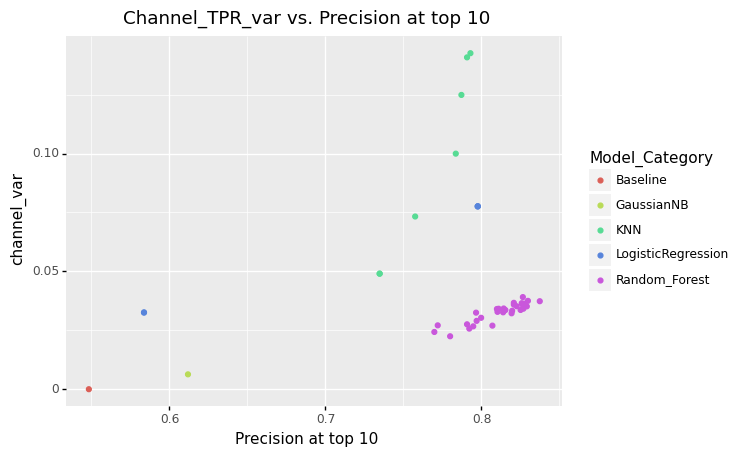

<ggplot: (148346293866)>

In [56]:
import plotnine as p9
(p9.ggplot()+
p9.geom_point(data=result_df, mapping=p9.aes(x='Precision at top 10',y='channel_var',color='Model_Category'),show_legend=True)+
p9.labs(title='Channel_TPR_var vs. Precision at top 10'))

__Result graph: Weekday_TPR_var vs. Precision at top 10__

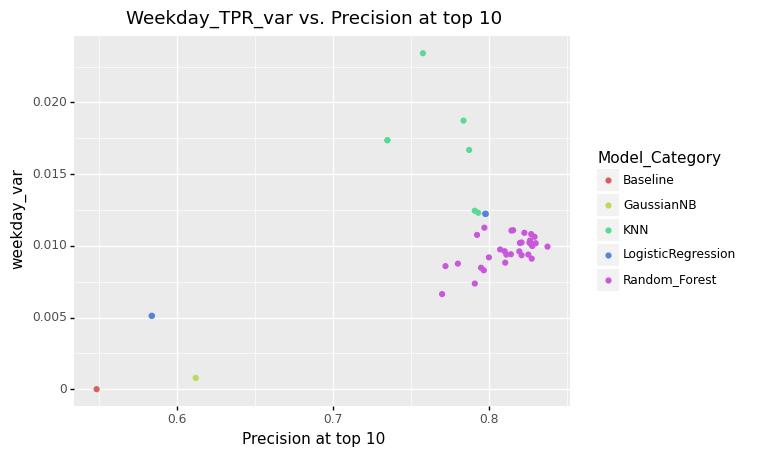

<ggplot: (148346293860)>

In [57]:
(p9.ggplot()+
p9.geom_point(data=result_df, mapping=p9.aes(x='Precision at top 10',y='weekday_var',color='Model_Category'),show_legend=True)+
p9.labs(title='Weekday_TPR_var vs. Precision at top 10')
)

So, we have seen that the random forest group is the lower right corner with high precision and low variances, which means it is a group of models with good efficiency and fairness. So, we want to pick the model among the random forest ones, and we want to zoom into the random forest models to see which one we want to pick specifically.

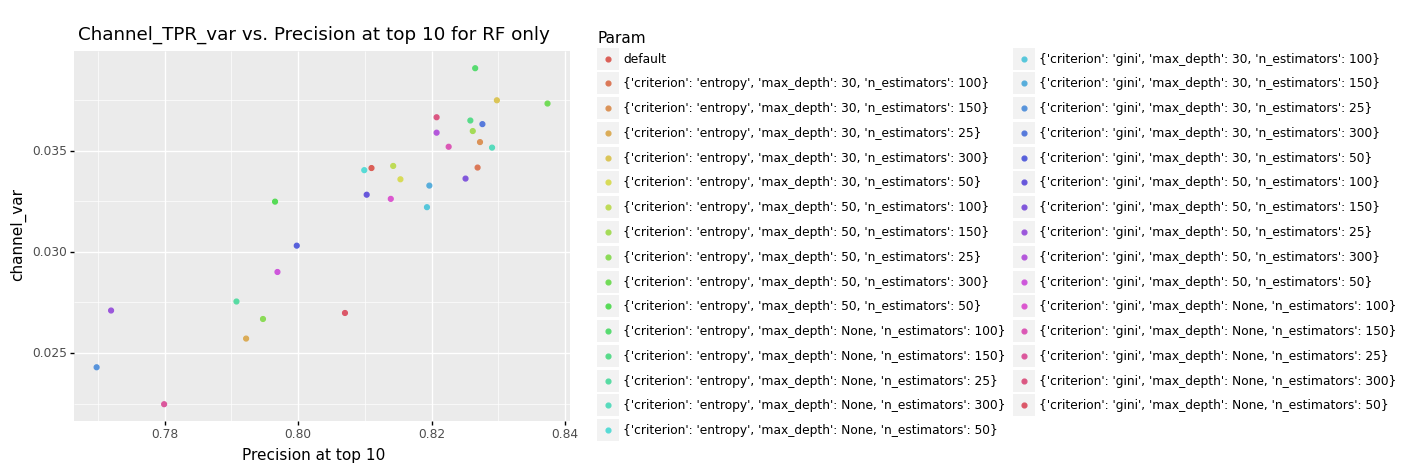

<ggplot: (148346264092)>

In [58]:
rf_df=result_df[result_df['Model_Category']=='Random_Forest']
(p9.ggplot()+
p9.geom_point(data=rf_df, mapping=p9.aes(x='Precision at top 10',y='channel_var',color='Param'),show_legend=True)+
p9.labs(title='Channel_TPR_var vs. Precision at top 10 for RF only')
)

Here we see that RandomForestClassifier(criterion='entropy',max_depth=None,n_estimators=300) has almost the best precision at 10 among the random forests, and the model perform pretty fairly, also, it is a large tree, which should have more stable performance, so we want to go with that random forest.

__Check model performance over time__<br>
Before set on the forest, we also want to check if the model performance is stable across time periods

Here we are generating 4 training/test splits, each with 300 days for training, subsequential 100 days for test. With period 1 being the earlist split, and 4 being the latest, we want to check the model performance overtime.


In [59]:
#train/test split - overtime
train_df_1 = df[(df['timedelta']>=410) & (df['timedelta']<710)]
test_df_1 = df[(df['timedelta']>=310) & (df['timedelta']<410)]

train_df_2 = df[(df['timedelta']>=310) & (df['timedelta']<610)]
test_df_2 = df[(df['timedelta']>=210) & (df['timedelta']<310)]

train_df_3 = df[(df['timedelta']>=210) & (df['timedelta']<510)]
test_df_3 = df[(df['timedelta']>=110) & (df['timedelta']<210)]

train_df_4 = df[(df['timedelta']>=110) & (df['timedelta']<410)]
test_df_4 = df[(df['timedelta']>=10) & (df['timedelta']<110)]

X_train_1 = train_df_1.drop(['url','shares', 'timedelta','label'], axis=1)
X_test_1 = test_df_1.drop(['url','shares', 'timedelta','label'], axis=1)
y_train_1 = train_df_1['label']
y_test_1 = test_df_1['label']

X_train_2 = train_df_2.drop(['url','shares', 'timedelta','label'], axis=1)
X_test_2 = test_df_2.drop(['url','shares', 'timedelta','label'], axis=1)
y_train_2 = train_df_2['label']
y_test_2 = test_df_2['label']

X_train_3 = train_df_3.drop(['url','shares', 'timedelta','label'], axis=1)
X_test_3 = test_df_3.drop(['url','shares', 'timedelta','label'], axis=1)
y_train_3 = train_df_3['label']
y_test_3 = test_df_3['label']

X_train_4 = train_df_4.drop(['url','shares', 'timedelta','label'], axis=1)
X_test_4 = test_df_4.drop(['url','shares', 'timedelta','label'], axis=1)
y_train_4 = train_df_4['label']
y_test_4 = test_df_4['label']

#Feature Scaling - MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

sc = MinMaxScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

sc = MinMaxScaler()
X_train_3 = sc.fit_transform(X_train_3)
X_test_3 = sc.transform(X_test_3)

sc = MinMaxScaler()
X_train_4 = sc.fit_transform(X_train_4)
X_test_4 = sc.transform(X_test_4)

initialize a list to record the results for models overtime

In [60]:
result_lst_overtime=list()

__Run different models across time__

In [61]:
param_grid = {'n_estimators':[25,50,100,150,300],'criterion':['gini','entropy'],'max_depth':[None,30,50]}

In [62]:
from sklearn.model_selection import ParameterGrid
for param in list(ParameterGrid(param_grid)):
    rf=RandomForestClassifier()
    rf.set_params(**param)    
    rf.fit(X_train_1, y_train_1)
    y_pred_rf_1 = rf.predict_proba(X_test_1)
    precision_at_k_1=precision_at_k(y_test_1, y_pred_rf_1)
    
    rf.fit(X_train_2, y_train_2)
    y_pred_rf_2 = rf.predict_proba(X_test_2)
    precision_at_k_2=precision_at_k(y_test_2, y_pred_rf_2)
    
    rf.fit(X_train_3, y_train_3)
    y_pred_rf_3 = rf.predict_proba(X_test_3)
    precision_at_k_3=precision_at_k(y_test_3, y_pred_rf_3)
    
    rf.fit(X_train_4, y_train_4)
    y_pred_rf_4 = rf.predict_proba(X_test_4)
    precision_at_k_4=precision_at_k(y_test_4, y_pred_rf_4)
    
    result_lst_overtime.append(['Random_Forest',param,precision_at_k_1,precision_at_k_2,precision_at_k_3,precision_at_k_4])


In [63]:
param_grid = {'n_neighbors':[5,10,25,50,75,100]}

In [64]:
for param in list(ParameterGrid(param_grid)):
    knn = KNeighborsClassifier()
    knn.set_params(**param)

    knn.fit(X_train_1, y_train_1)
    y_pred_knn_1 = knn.predict_proba(X_test_1)
    precision_at_k_1=precision_at_k(y_test_1, y_pred_knn_1)
    
    knn.fit(X_train_2, y_train_2)
    y_pred_knn_2 = knn.predict_proba(X_test_2)
    precision_at_k_2=precision_at_k(y_test_2, y_pred_knn_2)
    
    knn.fit(X_train_3, y_train_3)
    y_pred_knn_3 = knn.predict_proba(X_test_3)
    precision_at_k_3=precision_at_k(y_test_3, y_pred_knn_3)
    
    knn.fit(X_train_4, y_train_4)
    y_pred_knn_4 = knn.predict_proba(X_test_4)
    precision_at_k_4=precision_at_k(y_test_4, y_pred_knn_4)
    
    result_lst_overtime.append(['KNN',param,precision_at_k_1,precision_at_k_2,precision_at_k_3,precision_at_k_4])
    

In [65]:
param_grid = {'penalty':['none','l2'],'max_iter':[1000,2000]}

In [66]:
from sklearn.model_selection import ParameterGrid
for param in list(ParameterGrid(param_grid)):
    lgr=LogisticRegression()
    lgr.set_params(**param)
    
    lgr.fit(X_train_1, y_train_1)
    y_pred_lgr_1 = lgr.predict_proba(X_test_1)
    precision_at_k_1=precision_at_k(y_test_1, y_pred_lgr_1)
    
    lgr.fit(X_train_2, y_train_2)
    y_pred_lgr_2 = lgr.predict_proba(X_test_2)
    precision_at_k_2=precision_at_k(y_test_2, y_pred_lgr_2)
    
    lgr.fit(X_train_3, y_train_3)
    y_pred_lgr_3 = lgr.predict_proba(X_test_3)
    precision_at_k_3=precision_at_k(y_test_3, y_pred_lgr_3)
    
    lgr.fit(X_train_4, y_train_4)
    y_pred_lgr_4 = lgr.predict_proba(X_test_4)
    precision_at_k_4=precision_at_k(y_test_4, y_pred_lgr_4)
    
    result_lst_overtime.append(['LogisticRegression',param,precision_at_k_1,precision_at_k_2,precision_at_k_3,precision_at_k_4])


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [67]:
nb = GaussianNB()
nb.fit(X_train_1, y_train_1)
y_pred_nb_1 = nb.predict_proba(X_test_1)
precision_at_k_1=precision_at_k(y_test_1, y_pred_nb_1)

nb.fit(X_train_2, y_train_2)
y_pred_nb_2 = nb.predict_proba(X_test_2)
precision_at_k_2=precision_at_k(y_test_2, y_pred_nb_2)

nb.fit(X_train_3, y_train_3)
y_pred_nb_3 = nb.predict_proba(X_test_3)
precision_at_k_3=precision_at_k(y_test_3, y_pred_nb_3)

nb.fit(X_train_4, y_train_4)
y_pred_nb_4 = nb.predict_proba(X_test_4)
precision_at_k_4=precision_at_k(y_test_4, y_pred_nb_4)
    
result_lst_overtime.append(['GaussianNB','default',precision_at_k_1,precision_at_k_2,precision_at_k_3,precision_at_k_4])


In [68]:
#baseline
precision_at_k_1=sum(y_test_1)/len(y_test_1)

precision_at_k_2=sum(y_test_2)/len(y_test_2)

precision_at_k_3=sum(y_test_3)/len(y_test_3)

precision_at_k_4=sum(y_test_4)/len(y_test_4)
    
result_lst_overtime.append(['Baseline','baseline',precision_at_k_1,precision_at_k_2,precision_at_k_3,precision_at_k_4])

reorganize the list to dataframe

In [69]:
result_df_overtime = pd.DataFrame(result_lst_overtime, columns = ['Model_Category', 'Param', 'Precision at top 10_1', 'Precision at top 10_2', 'Precision at top 10_3', 'Precision at top 10_4'])
result_df_overtime_T=result_df_overtime.T
result_df_overtime_T=result_df_overtime_T[2:]
result_df_overtime_T.astype('float')
result_df_overtime_T.columns=[str(x) for x in range(42)]
result_df_overtime_T['time_period']=[1,2,3,4]

__Model performance over time__

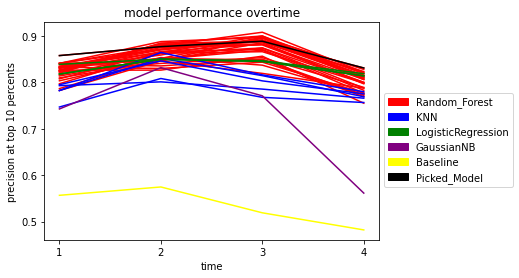

In [70]:
import matplotlib.pyplot as plt
for i in [str(x) for x in range(30)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='red')
for i in [str(x) for x in range(31,36)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='blue')
for i in [str(x) for x in range(37,40)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='green')
plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['40'],color='purple')
plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['41'],color='yellow')

plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['19'],color='black')

plt.xticks([1,2,3,4])
plt.xlabel('time')
plt.ylabel('precision at top 10 percents')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Random_Forest')
blue_patch = mpatches.Patch(color='blue', label='KNN')
green_patch = mpatches.Patch(color='green', label='LogisticRegression')
purple_patch = mpatches.Patch(color='purple', label='GaussianNB')
yellow_patch = mpatches.Patch(color='yellow', label='Baseline')
black_patch = mpatches.Patch(color='black', label='Picked_Model')

plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,yellow_patch,black_patch],bbox_to_anchor=(1, 0.7))
plt.title('model performance overtime')
plt.show()

#### 6.b Feature Importance<a name="feature_method"></a>

After having picked the model we want to use, we want to take a closer look at the model evaluation metrics, and especially look at the feature importance of th random forest and see what does that tell us

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',max_depth=None,n_estimators=300)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)

In [72]:
y_pred_rf_binary=pd.Series([1 if i > 0.5 else 0 for i in y_pred_rf[:,1]])
print('accuracy:',metrics.accuracy_score(y_test, y_pred_rf_binary))

accuracy: 0.6411637152150343


In [73]:
print('precision_at_top_10:',precision_at_k(y_test, y_pred_rf))

precision_at_top_10: 0.8319479580773401


In [74]:
from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

auc: 0.6925825928088383


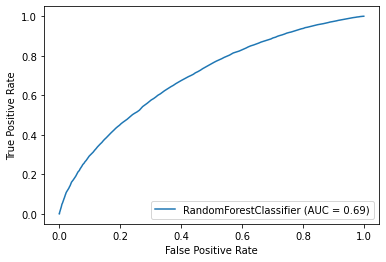

In [75]:
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(rf, X_test, y_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_rf_binary))
print(classification_report(y_test, y_pred_rf_binary))

[[ 7303  5195]
 [ 4734 10438]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.60     12498
           1       0.67      0.69      0.68     15172

    accuracy                           0.64     27670
   macro avg       0.64      0.64      0.64     27670
weighted avg       0.64      0.64      0.64     27670



__Feature Importance__

Subjective, negative news is more popular

News sites should emphasize including popular keywords, referencing other popular articles, increasing unique, meaningful content, and decreasing word length in order for articles to be more popular.

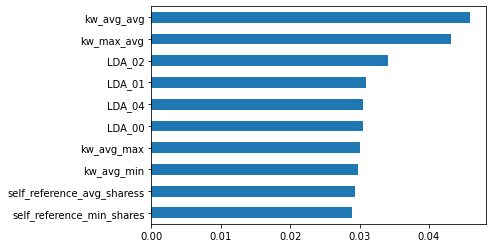

In [77]:
feat_importances = pd.Series(rf.feature_importances_, index=X_names)
ax = feat_importances.sort_values(ascending=False)[:10].plot.barh()
ax.invert_yaxis()

### 7 Conclusion of findings<a name="finding"></a>

#### 7.a Model Selection<a name="model_finding"></a> 
We should use the model RandomForestClassifier(criterion='entropy',max_depth=None,n_estimators=300) to do our prediciton of the top 10 percent most likely popular news. It's a good model in terms of efficiency (precision at top 10, 54% better than random guess), fairness and stable performance overtime.

__Result graph: Channel_TPR_var vs. Precision at top 10__

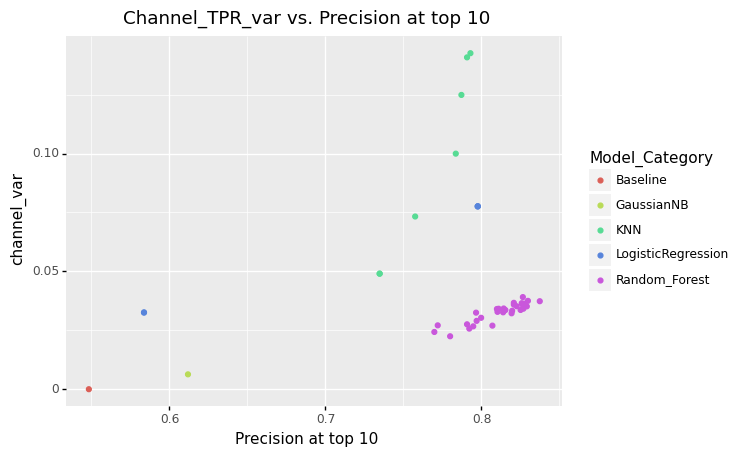

<ggplot: (148342761394)>

In [78]:
import plotnine as p9
(p9.ggplot()+
p9.geom_point(data=result_df, mapping=p9.aes(x='Precision at top 10',y='channel_var',color='Model_Category'),show_legend=True)+
p9.labs(title='Channel_TPR_var vs. Precision at top 10'))

__Result graph: Weekday_TPR_var vs. Precision at top 10__

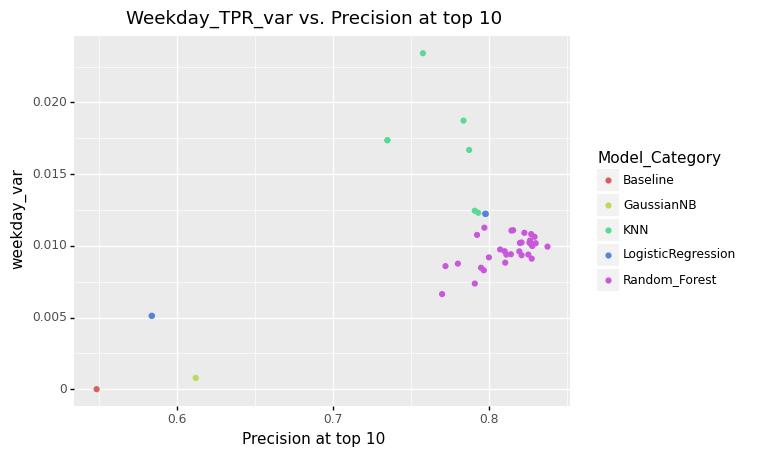

<ggplot: (148344451163)>

In [79]:
(p9.ggplot()+
p9.geom_point(data=result_df, mapping=p9.aes(x='Precision at top 10',y='weekday_var',color='Model_Category'),show_legend=True)+
p9.labs(title='Weekday_TPR_var vs. Precision at top 10')
)

__Result graph: Zoom in to the random forests__

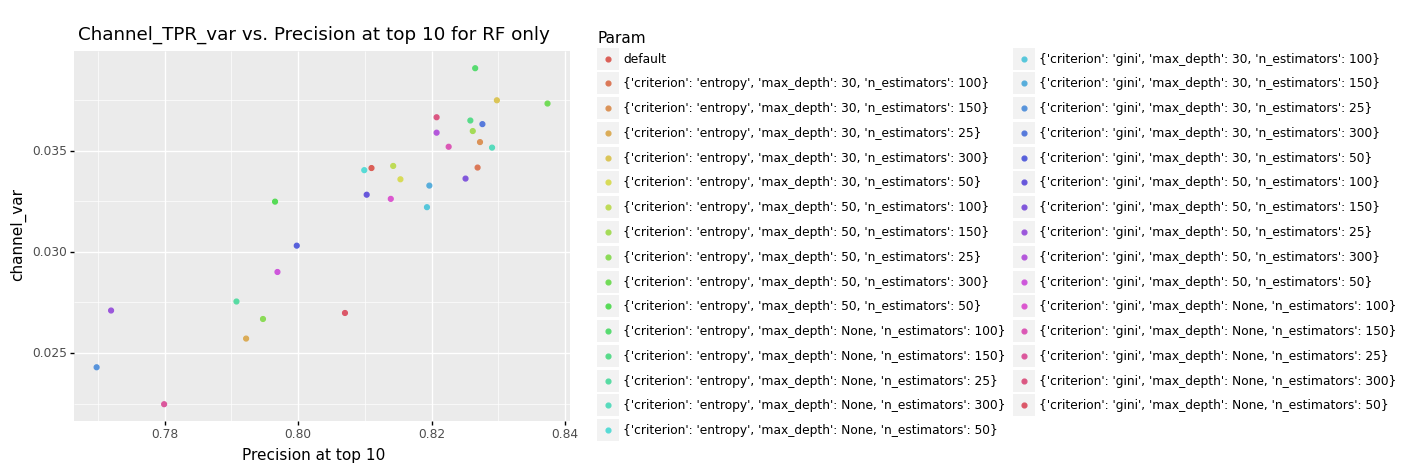

<ggplot: (148342773002)>

In [80]:
rf_df=result_df[result_df['Model_Category']=='Random_Forest']
(p9.ggplot()+
p9.geom_point(data=rf_df, mapping=p9.aes(x='Precision at top 10',y='channel_var',color='Param'),show_legend=True)+
p9.labs(title='Channel_TPR_var vs. Precision at top 10 for RF only')
)

__Result graph: Model Performance over time__

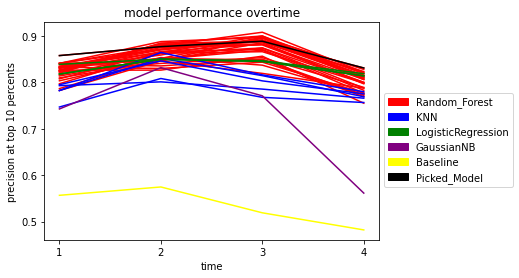

In [81]:
import matplotlib.pyplot as plt
for i in [str(x) for x in range(30)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='red')
for i in [str(x) for x in range(31,36)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='blue')
for i in [str(x) for x in range(37,40)]:
    plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T[i],color='green')
plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['40'],color='purple')
plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['41'],color='yellow')

plt.plot(result_df_overtime_T['time_period'], result_df_overtime_T['19'],color='black')

plt.xticks([1,2,3,4])
plt.xlabel('time')
plt.ylabel('precision at top 10 percents')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Random_Forest')
blue_patch = mpatches.Patch(color='blue', label='KNN')
green_patch = mpatches.Patch(color='green', label='LogisticRegression')
purple_patch = mpatches.Patch(color='purple', label='GaussianNB')
yellow_patch = mpatches.Patch(color='yellow', label='Baseline')
black_patch = mpatches.Patch(color='black', label='Picked_Model')

plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,yellow_patch,black_patch],bbox_to_anchor=(1, 0.7))
plt.title('model performance overtime')
plt.show()

#### 7.b Feature Importance: <a name="feature_finding"></a>

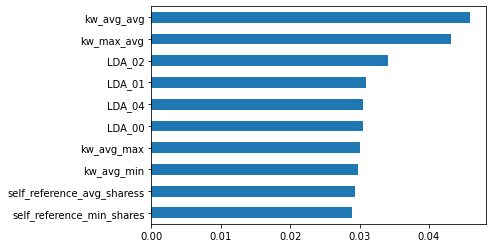

In [82]:
feat_importances = pd.Series(rf.feature_importances_, index=X_names)
ax = feat_importances.sort_values(ascending=False)[:10].plot.barh()
ax.invert_yaxis()

### 8. Recommendation<a name="recommendation"></a>

Based on our results and analysis, we are proposing the following recommendations:

__General Recommendation to news website:__
- Use our model to select the likely popular news daily! Our model have been proven to be efficent (55% more efficient than baseline), fair (relatively fair across different channels and different weekdays) and stable (model performance is stable across time period).

__Recommendation for making news more population:__
- Include popular keywords (max, min, avg)
- Reference other popular articles
- Increase non-stop unique tokens (more unique, meaningful content)
- Decrease word length
- Increase sentiment subjectivity and decrease sentiment polarity


### 9. Limitations & Future Work<a name="future_work"></a>

__Try more advanced feature importances measures:__
- Our current feature importance are based on coefficients from logistic regression, and feature importance from the random forest; more advanced feature importance measures such as SHAP may be acble to provide more insights or give more reliable results on features importance.

__Develop prediction model for number of shares:__
- Our current value proposition are based on pridicting the top 10 percent most popular news, however, we think it would also be valuable to come up with prediction models for the exact # of shares each news will get. So, in the future, maybe we could try to convert from classification problem to regression problem and build prediction models for number of shares .


### 10. Appendix<a name="appendix"></a>

Some explorational work for possible regression tasks

__Regression Task__

We want to try to treat this problem as a regression task, basically, we want to be able to predict the number of shares(popularity). So, we come up with a base rate we wanna beat, and test out several models - Random Forest, Linear Reg & KNN (We have about 40k observations, so we are not going to use SVM, which is an inefficient algorithm for dataset with many rows) 

In [83]:
from sklearn.model_selection import train_test_split
df=pd.read_csv('OnlineNewsPopularity.csv')
X=df.drop(['url',' shares'], axis=1)
y=df[' shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Our base rate would be predicting using the average of # of shares for all the news

In [84]:
print('base rate | Mean Squared Error',y_test.var())
print('base rate | Root Mean Squared Error',y_test.std())

base rate | Mean Squared Error 68285261.62727058
base rate | Root Mean Squared Error 8263.489676115689


__Random Forest Regression__

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_50 = RandomForestRegressor(n_estimators=50, random_state=0)
rf_50.fit(X_train, y_train)
y_pred_rf_50 = rf_50.predict(X_test)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf_50))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf_50))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_50)))

Mean Absolute Error: 3437.861464604002
Mean Squared Error: 84252090.77796344
Root Mean Squared Error: 9178.893766569228


take a look at the feature importance from Random Forest, the graph is showing the most important 10 features

<AxesSubplot:>

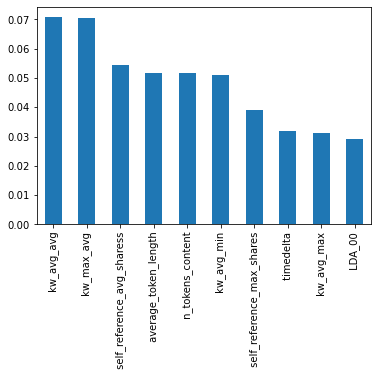

In [87]:
feat_importances = pd.Series(rf_50.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)[:10].plot.bar()

__Linear Regression__

In [88]:
from sklearn.linear_model import LinearRegression

lgr = LinearRegression(fit_intercept=True)
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgr)))

Mean Absolute Error: 3110.4722876147634
Mean Squared Error: 213870328.5770239
Root Mean Squared Error: 14624.30608873542


__KNN Regression__

In [90]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 3215.161930385068
Mean Squared Error: 83696928.07135698
Root Mean Squared Error: 9148.60252013153


__Regression Conclusion__<br>
So far, we haven't found a good model that can beat the base rate, this reminds us that this regression task is difficult, and more effort need to be put into to get a good regression model